In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)

In [3]:

data=pd.read_csv('C:/Users/smile/OneDrive/Desktop/train.csv')

In [4]:
data.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1


In [5]:
data.shape

(6136, 14)

In [6]:
data.shape

(6136, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Id                             6136 non-null   int64 
 1   Review                         6136 non-null   object
 2   Components                     6136 non-null   int64 
 3   Delivery and Customer Support  6136 non-null   int64 
 4   Design and Aesthetics          6136 non-null   int64 
 5   Dimensions                     6136 non-null   int64 
 6   Features                       6136 non-null   int64 
 7   Functionality                  6136 non-null   int64 
 8   Installation                   6136 non-null   int64 
 9   Material                       6136 non-null   int64 
 10  Price                          6136 non-null   int64 
 11  Quality                        6136 non-null   int64 
 12  Usability                      6136 non-null   int64 
 13  Pol

In [8]:
data.Polarity.value_counts()

1    4770
0    1366
Name: Polarity, dtype: int64

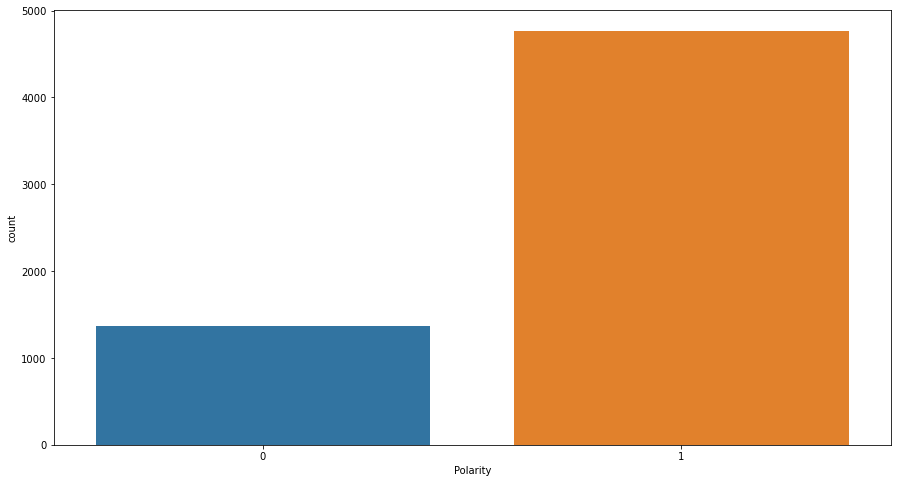

In [9]:
sns.countplot(data.Polarity)
plt.show()

In [10]:
data.drop(['Id'],axis=1,inplace=True)

In [11]:
data.isnull().sum()

Review                           0
Components                       0
Delivery and Customer Support    0
Design and Aesthetics            0
Dimensions                       0
Features                         0
Functionality                    0
Installation                     0
Material                         0
Price                            0
Quality                          0
Usability                        0
Polarity                         0
dtype: int64

In [12]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

In [13]:
missing_value_data

,column_name,percent_missing
Review,Review,0.0
Components,Components,0.0
Delivery and Customer Support,Delivery and Customer Support,0.0
Design and Aesthetics,Design and Aesthetics,0.0
Dimensions,Dimensions,0.0
Features,Features,0.0
Functionality,Functionality,0.0
Installation,Installation,0.0
Material,Material,0.0
Price,Price,0.0


In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

Review                           0
Components                       0
Delivery and Customer Support    0
Design and Aesthetics            0
Dimensions                       0
Features                         0
Functionality                    0
Installation                     0
Material                         0
Price                            0
Quality                          0
Usability                        0
Polarity                         0
dtype: int64

In [16]:
data.Components.value_counts()

0    5862
1     274
Name: Components, dtype: int64

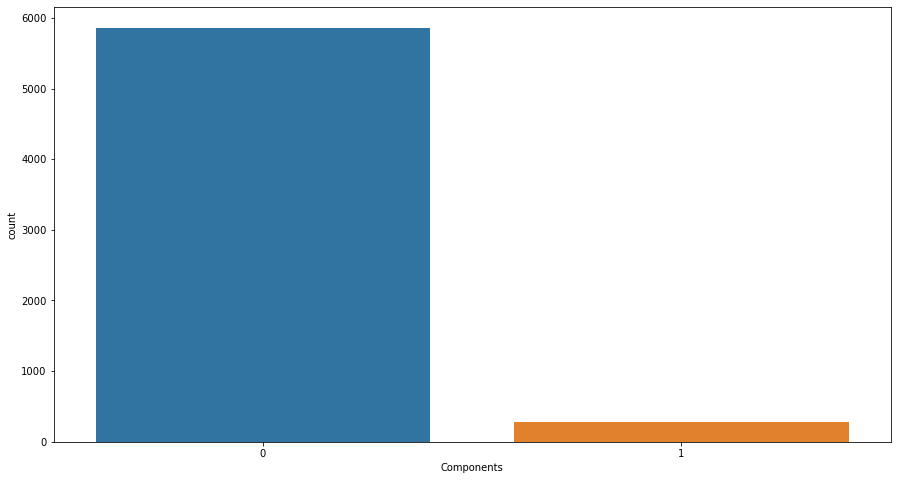

In [17]:
sns.countplot(data.Components)
plt.show()

In [18]:
from scipy.stats import chi2_contingency
a=pd.crosstab(index=data.Components,columns=data.Polarity)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])
if b[1]<0.05:
        print('It is a good predictor')
else:
        print('Bad Predictor')

Polarity       0     1
Components            
0           1182  4680
1            184    90
p value is: 5.094356681390319e-74
It is a good predictor


<AxesSubplot:xlabel='Components', ylabel='Polarity'>

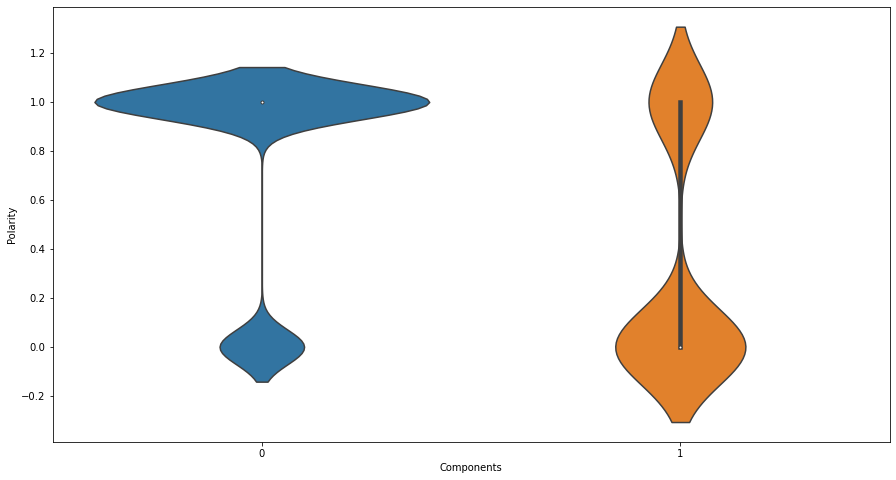

In [19]:
sns.violinplot(x ="Components",
             y ="Polarity",
             data = data)

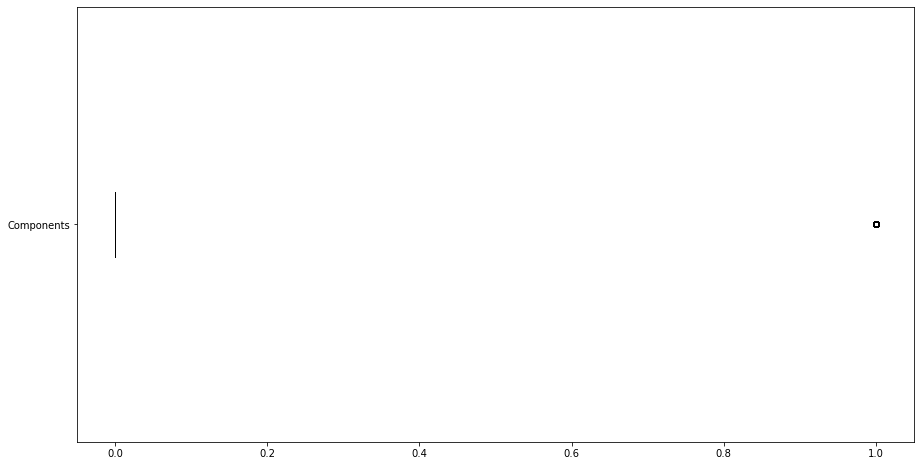

In [20]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Components.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [21]:
data['Delivery and Customer Support'].value_counts()

0    5957
1     179
Name: Delivery and Customer Support, dtype: int64

<AxesSubplot:xlabel='Delivery and Customer Support', ylabel='count'>

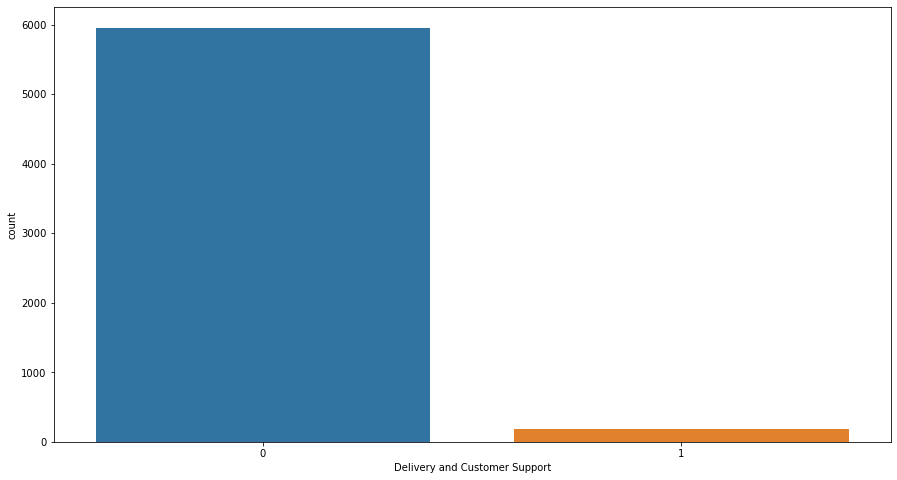

In [22]:
sns.countplot(data['Delivery and Customer Support'])

In [23]:
from scipy.stats import chi2_contingency
a=pd.crosstab(index=data['Delivery and Customer Support'],columns=data.Polarity)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])
if b[1]<0.05:
        print('It is a good predictor')
else:
        print('Bad Predictor')

Polarity                          0     1
Delivery and Customer Support            
0                              1289  4668
1                                77   102
p value is: 2.3369404688585878e-11
It is a good predictor


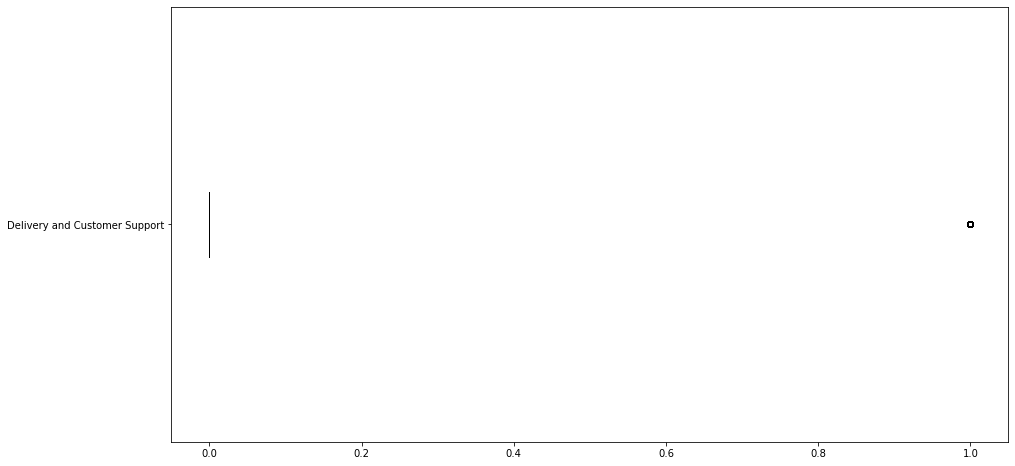

In [24]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data['Delivery and Customer Support'].plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [25]:
data['Design and Aesthetics'].value_counts()

0    5486
1     650
Name: Design and Aesthetics, dtype: int64

<AxesSubplot:xlabel='Design and Aesthetics', ylabel='count'>

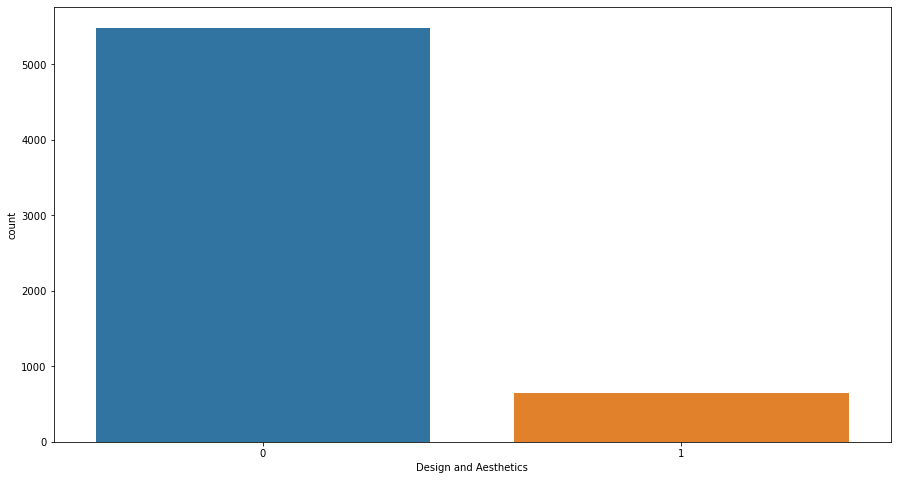

In [26]:
sns.countplot(data['Design and Aesthetics'])

In [27]:
a=pd.crosstab(index=data['Design and Aesthetics'],columns=data.Polarity)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])
if b[1]<0.05:
        print('It is a good predictor')
else:
        print('Bad Predictor')

Polarity                  0     1
Design and Aesthetics            
0                      1242  4244
1                       124   526
p value is: 0.04394933982752325
It is a good predictor


In [28]:
data['Dimensions'].value_counts()

0    5441
1     695
Name: Dimensions, dtype: int64

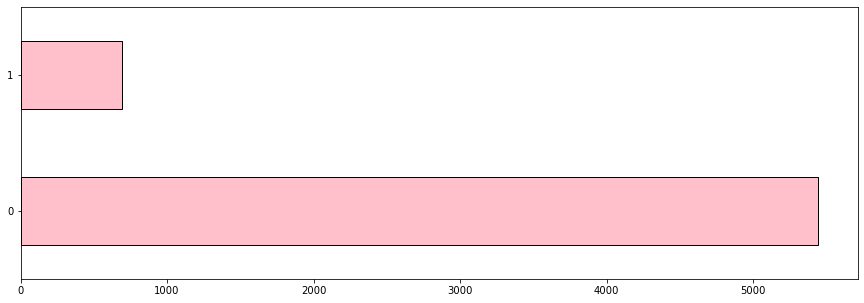

In [29]:
data['Dimensions'].value_counts().plot(kind='barh',figsize=(15,5),color='pink',edgecolor='black')
plt.show()

In [30]:
a=pd.crosstab(index=data['Dimensions'],columns=data.Polarity)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])
if b[1]<0.05:
        print('It is a good predictor')
else:
        print('Bad Predictor')

Polarity       0     1
Dimensions            
0           1240  4201
1            126   569
p value is: 0.006282107282828818
It is a good predictor


In [31]:
data['Features'].value_counts()

0    5823
1     313
Name: Features, dtype: int64

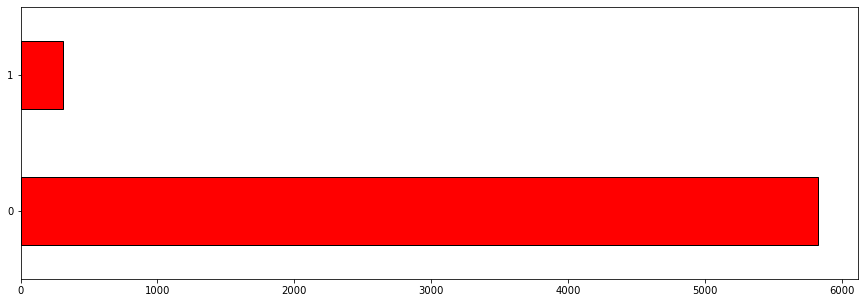

In [32]:
data['Features'].value_counts().plot(kind='barh',figsize=(15,5),color='red',edgecolor='black')
plt.show()

In [33]:
a=pd.crosstab(index=data['Features'],columns=data.Polarity)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])
if b[1]<0.05:
        print('It is a good predictor')
else:
        print('Bad Predictor')

Polarity     0     1
Features            
0         1317  4506
1           49   264
p value is: 0.004883036545967667
It is a good predictor


In [34]:
data['Functionality'].value_counts()

0    3598
1    2538
Name: Functionality, dtype: int64

<AxesSubplot:xlabel='Functionality', ylabel='count'>

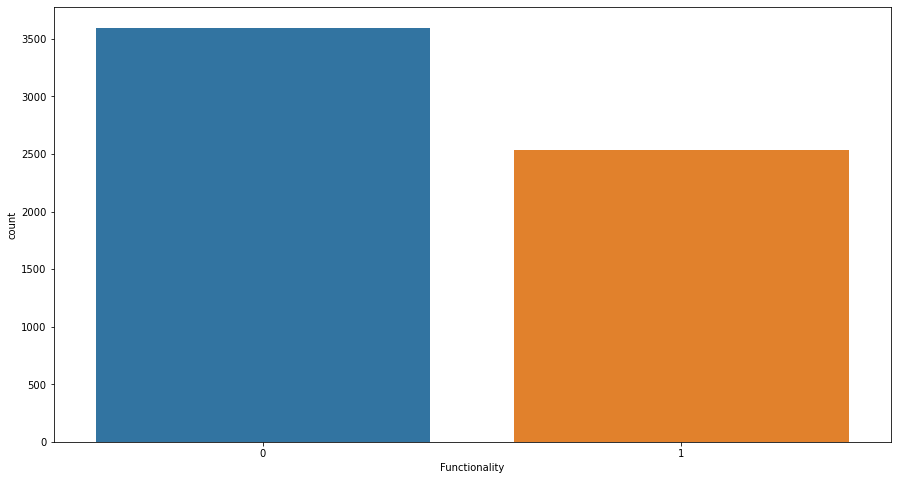

In [35]:
sns.countplot(data['Functionality'])

In [36]:
a=pd.crosstab(index=data['Functionality'],columns=data.Polarity)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])
if b[1]<0.05:
        print('It is a good predictor')
else:
        print('Bad Predictor')

Polarity         0     1
Functionality           
0              827  2771
1              539  1999
p value is: 0.11191828882846118
Bad Predictor


In [37]:
data.drop(['Functionality'],axis=1,inplace=True)

In [38]:
data['Installation'].value_counts()

0    5374
1     762
Name: Installation, dtype: int64

<AxesSubplot:xlabel='Installation', ylabel='count'>

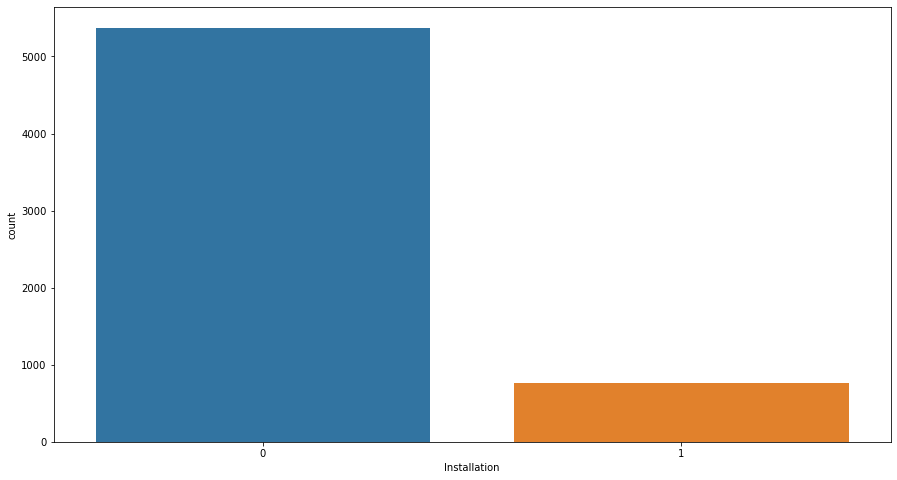

In [39]:
sns.countplot(data['Installation'])

In [40]:
a=pd.crosstab(index=data['Installation'],columns=data.Polarity)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])
if b[1]<0.05:
        print('It is a good predictor')
else:
        print('Bad Predictor')

Polarity         0     1
Installation            
0             1288  4086
1               78   684
p value is: 2.246067844302169e-17
It is a good predictor


In [41]:
data['Material'].value_counts()

0    5981
1     155
Name: Material, dtype: int64

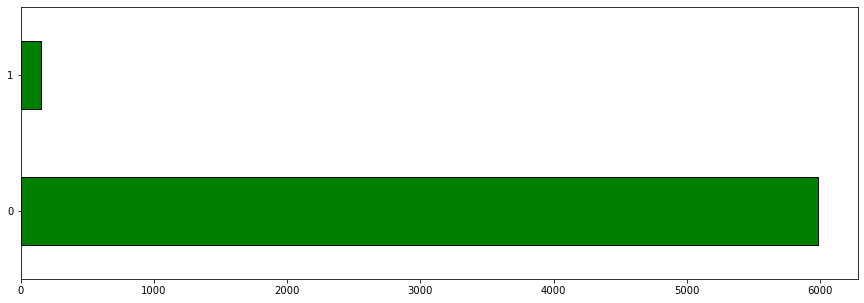

In [42]:
data['Material'].value_counts().plot(kind='barh',figsize=(15,5),color='green',edgecolor='black')
plt.show()

In [43]:
a=pd.crosstab(index=data['Material'],columns=data.Polarity)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])
if b[1]<0.05:
        print('It is a good predictor')
else:
        print('Bad Predictor')

Polarity     0     1
Material            
0         1299  4682
1           67    88
p value is: 3.9279773010829216e-10
It is a good predictor


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6136 entries, 0 to 6135
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Review                         6136 non-null   object
 1   Components                     6136 non-null   int64 
 2   Delivery and Customer Support  6136 non-null   int64 
 3   Design and Aesthetics          6136 non-null   int64 
 4   Dimensions                     6136 non-null   int64 
 5   Features                       6136 non-null   int64 
 6   Installation                   6136 non-null   int64 
 7   Material                       6136 non-null   int64 
 8   Price                          6136 non-null   int64 
 9   Quality                        6136 non-null   int64 
 10  Usability                      6136 non-null   int64 
 11  Polarity                       6136 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 752.2+ KB


In [45]:
data['Price'].value_counts()

0    5282
1     854
Name: Price, dtype: int64

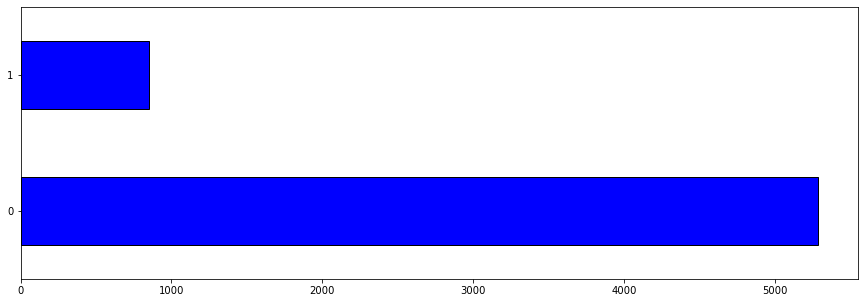

In [46]:
data['Price'].value_counts().plot(kind='barh',figsize=(15,5),color='blue',edgecolor='black')
plt.show()

In [47]:
a=pd.crosstab(index=data['Price'],columns=data.Polarity)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])

if b[1]<0.05:
        print('It is a good predictor')
else:
        print('Bad Predictor')

Polarity     0     1
Price               
0         1262  4020
1          104   750
p value is: 3.182434604546281e-14
It is a good predictor


In [48]:
data['Quality'].value_counts()

0    3959
1    2177
Name: Quality, dtype: int64

<AxesSubplot:xlabel='Quality', ylabel='count'>

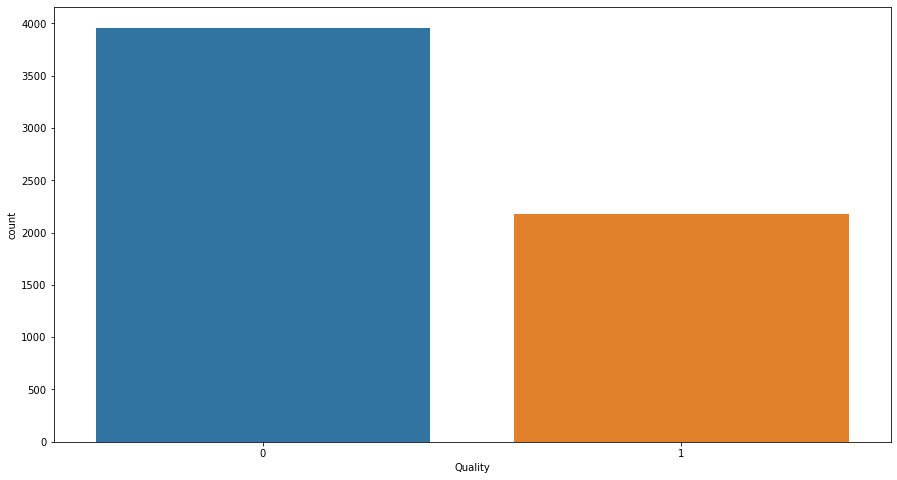

In [49]:
sns.countplot(data['Quality'])

In [50]:
a=pd.crosstab(index=data['Quality'],columns=data.Polarity)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])
if b[1]<0.05:
        print('It is a good predictor')
else:
        print('Bad Predictor')

Polarity    0     1
Quality            
0         798  3161
1         568  1609
p value is: 1.0711172917628756e-07
It is a good predictor


In [51]:
data['Usability'].value_counts()

0    4907
1    1229
Name: Usability, dtype: int64

<AxesSubplot:xlabel='Usability', ylabel='count'>

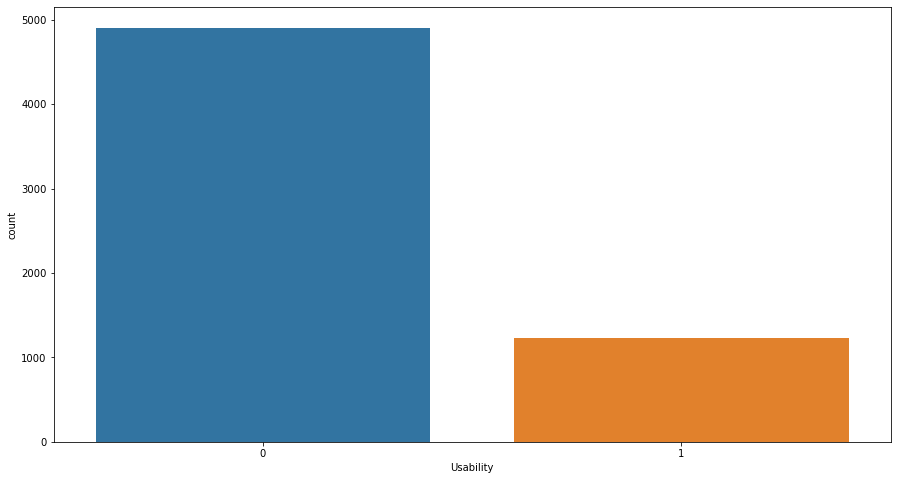

In [52]:
sns.countplot(data['Usability'])

In [53]:
a=pd.crosstab(index=data['Usability'],columns=data.Polarity)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])
if b[1]<0.05:
        print('It is a good predictor')
else:
        print('Bad Predictor')

Polarity      0     1
Usability            
0          1252  3655
1           114  1115
p value is: 3.1385992337733276e-34
It is a good predictor


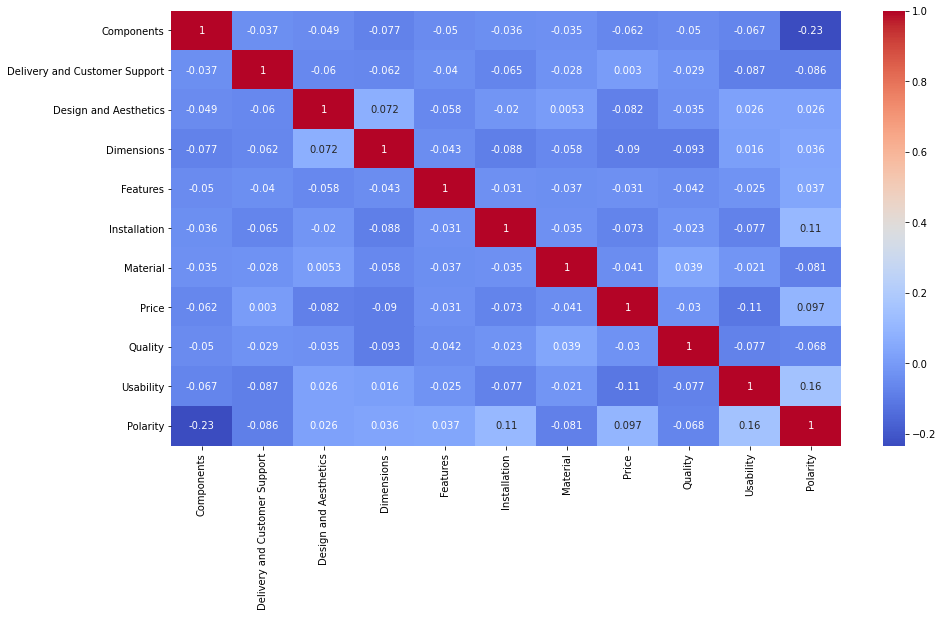

In [54]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [55]:
data1=data.copy()


In [56]:
data.drop(['Review'],axis=1,inplace=True)

In [57]:
x=data.drop('Polarity',axis=1)
y=data['Polarity']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=123)
print(len(x_train)) 
print(len(x_test)) 
print(len(y_train)) 
print(len(y_test))

4111
2025
4111
2025


In [60]:
#Answer6
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc,roc_auc_score

In [61]:
rfr=RandomForestClassifier()
model_rfr=rfr.fit(x_train,y_train)

ypred_rfr=model_rfr.predict(x_test)
ypred_rfr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [62]:
confusion_matrix(y_test,ypred_rfr)

array([[  83,  349],
       [  63, 1530]], dtype=int64)

In [63]:
print(classification_report(y_test,ypred_rfr))

              precision    recall  f1-score   support

           0       0.57      0.19      0.29       432
           1       0.81      0.96      0.88      1593

    accuracy                           0.80      2025
   macro avg       0.69      0.58      0.58      2025
weighted avg       0.76      0.80      0.75      2025



In [64]:
accuracy_rfr=accuracy_score(y_test,ypred_rfr)
accuracy_rfr=round(accuracy_rfr*100,1)
accuracy_rfr

79.7

In [65]:
test=pd.read_csv('C:/Users/smile/OneDrive/Desktop/test.csv')

In [66]:
test.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,Made of very thin cheap metal broke on very fi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"As good as the brand names, no jams or misfire...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"unit was easy to use, with understandable in s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,I am the new family plumber. Works well. No pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Seems to be holding up well.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
test.drop(['Id','Components','Delivery and Customer Support','Design and Aesthetics','Dimensions','Features'],axis=1,inplace=True)

In [68]:
test.drop(['Functionality','Installation','Material','Price','Quality','Usability','Polarity'],axis=1,inplace=True)

In [69]:
test.head()

,Review
0,Made of very thin cheap metal broke on very fi...
1,"As good as the brand names, no jams or misfire..."
2,"unit was easy to use, with understandable in s..."
3,I am the new family plumber. Works well. No pr...
4,Seems to be holding up well.


In [70]:
data.shape

(6136, 11)

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['Review'] = le.fit_transform(data1.Review.values)

In [76]:

test.head()

,Review
0,1223
1,59
2,2603
3,672
4,1502


In [77]:
pra=pd.merge(test,data1, on='Review')

In [78]:
pra=pra.drop(['Review','Polarity'],axis=1)

In [79]:
pra.head()

,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Installation,Material,Price,Quality,Usability
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0


In [82]:
test_pred=model_rfr.predict(pra)
test_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [83]:
submission105=pd.read_csv('C:/Users/smile/OneDrive\Desktop/submission.csv')

In [84]:
submission105

,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2626,0,0,0,0,0,0,0,0,0,0,0,0
2627,0,0,0,0,0,0,0,0,0,0,0,0
2628,0,0,0,0,0,0,0,0,0,0,0,0
2629,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
submission105['Polarity']=test_pred

In [86]:
submission105.to_csv('submission106.csv',index=False)